### Introduction to RLlib

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches
from IPython import display
import torch
from ray.rllib.models.preprocessors import get_preprocessor 
from ray.rllib.algorithms.ppo import PPO, PPOConfig
import pandas as pd
import gym
from gym.wrappers import TimeLimit

import json

**Creating an Agent**

In [ ]:
slippery_algo_config = (
    PPOConfig()
    .framework("torch")
    .rollouts(create_env_on_local_worker=True)
    .debugging(seed=0, log_level="ERROR")
    .training(model={"fcnet_hiddens": [64, 64]})
    .environment(env_config={"is_slippery": False})
    .evaluation(evaluation_config={"explore": False})
)

ppo = PPO(env="FrozenLake-v1", config=slippery_algo_config)
display.clear_output()

**Testing the agent**

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery=False)
obs = env.reset(seed=3)[0]
obs

In [ ]:
action = ppo.compute_single_action(obs, explore=False)
action # This is like calling the .predict method in sklearn without .fit()

In [ ]:
train_info = ppo.train() # Works like .fit()

**Training iterations** 

In fact, what we just did was one iteration of training.
RLlib will play through a bunch of episodes per iteration, depending on its hyperparameters

In [ ]:
print(len(train_info["hist_stats"]["episode_lengths"]))
# Looks like it ran ~500 episodes in that one iteration.

print(sum(train_info["hist_stats"]["episode_lengths"]))
# For a total of ~4000 time steps.

**Training info: episode lengths**

Let's look at the lengths of the last 100 episodes we played:

In [ ]:
print(train_info["hist_stats"]["episode_lengths"][-100:])


**Training info: episode rewards**

In [ ]:
print(train_info["hist_stats"]["episode_reward"][-100:])
print(f"Mean: {np.mean(train_info['hist_stats']['episode_reward'][-100:])}")


**Training more the agent**

In [ ]:
rewards = []
for i in range(10):
    train_info = ppo.train()
    rewards.append(train_info["episode_reward_mean"])

print(np.mean(train_info["hist_stats"]["episode_reward"]))

plt.plot(rewards)
plt.xlabel("iterations")
plt.ylabel("average reward")

**Evaluation**

Similar to score in sklearn

In [ ]:
eval_results = ppo.evaluate()
eval_results["evaluation"]["episode_reward_mean"]

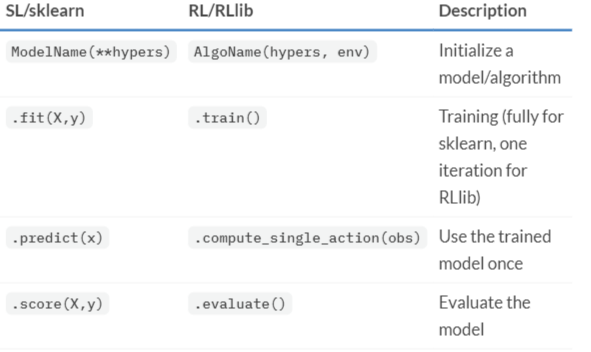

-----

**CartPole example**

In [2]:
algo_config = (
    PPOConfig()
    .training(
        model={"fcnet_hiddens": [64, 64]}, 
        gamma=0.95, 
        kl_coeff=0.2, 
        grad_clip=True,
        grad_clip_by="norm")
    .environment(
        env="CartPole-v0")
    .framework(
        "tf2",
        eager_tracing=True)
    .rollouts(create_env_on_local_worker=True)
    .evaluation(evaluation_config={"explore": False}, evaluation_duration_unit={"episodes": 5})
    .debugging(seed=0, log_level="ERROR")
)

ppo = algo_config.build()
display.clear_output()

In [3]:
env = gym.make("CartPole-v0")
obs = env.reset(seed=3)[0]
obs

c:\Users\Lenovo\anaconda3\envs\ray_env\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


array([-0.04143508, -0.02631895,  0.03012745,  0.0082162 ], dtype=float32)

In [4]:
ppo.compute_single_action(obs, explore=False)

0

Episode 0: 21.86813186813187
Episode 1: 34.780701754385966
Episode 2: 54.27
Episode 3: 82.5
Episode 4: 106.95
Episode 5: 135.91
Episode 6: 161.2
Episode 7: 174.61
Episode 8: 187.23
Episode 9: 192.34


Text(0, 0.5, 'average reward')

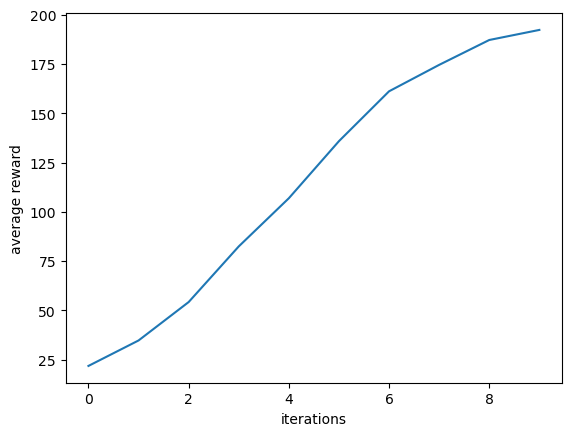

In [7]:
rewards = []
for i in range(10):
    train_info = ppo.train()
    print(f'Episode {i}: {np.mean(train_info["hist_stats"]["episode_reward"])}')
    rewards.append(train_info["episode_reward_mean"])

plt.plot(rewards)
plt.xlabel("iterations")
plt.ylabel("average reward")

In [8]:
eval_results = ppo.evaluate()
eval_results["evaluation"]["episode_reward_mean"]

200.0

In [9]:
env = gym.make("CartPole-v0")

obs = env.reset()[0]
tot_rew = 0
for _ in range(200):
    action = ppo.compute_single_action(obs, explore=False)
    obs, reward, _, done, _ = env.step(action)
    tot_rew += reward
    if done:
        print(f"You got {tot_rew} points!")
        break
env.close()

c:\Users\Lenovo\anaconda3\envs\ray_env\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


You got 200.0 points!


----

**Pendulum example**

In [12]:
algo_config = (
    PPOConfig()
    .training(
        model={"fcnet_hiddens": [256, 256]}, 
        gamma=0.95, 
        kl_coeff=0.2, 
        grad_clip=True)
    .environment(
        env="Pendulum-v0")
    .framework(
        "tf2",
        eager_tracing=True)
    .rollouts(create_env_on_local_worker=True)
    .evaluation(evaluation_config={"explore": False}, evaluation_duration_unit={"episodes": 5})
    .debugging(seed=0, log_level="ERROR")
)

ppo = algo_config.build()
display.clear_output()

In [6]:
env = gym.make("Pendulum-v0")
obs = env.reset()
obs

array([ 0.54516225, -0.83833056, -0.48974105])

In [7]:
ppo.compute_single_action(obs, explore=False)

array([0.01045251], dtype=float32)

Episode 1: -1281.5398876369077
Episode 2: -1187.890028927463
Episode 3: -1166.7311119971787
Episode 4: -1170.6640596592508
Episode 5: -1156.595862869769
Episode 6: -1120.99455447677
Episode 7: -1159.370173991561
Episode 8: -1153.5216501131029
Episode 9: -1138.139636074191
Episode 10: -1150.1395431387436
Episode 11: -1122.0126217928978
Episode 12: -1069.006631871999
Episode 13: -1058.2536407039631
Episode 14: -1050.5145937357233
Episode 15: -1042.915100947956
Episode 16: -1050.2291366395723
Episode 17: -1062.2167916347419
Episode 18: -1056.5092349163742
Episode 19: -1045.9974550903744
Episode 20: -1044.8958004929868
Episode 21: -1034.834816436606
Episode 22: -1012.1945276837411
Episode 23: -1003.3742199667738
Episode 24: -1017.9885554333828
Episode 25: -1005.0189030115911
Episode 26: -1024.192823810045
Episode 27: -1021.293458784077
Episode 28: -1030.2177320676763
Episode 29: -1028.0025109088858
Episode 30: -1012.4498721741694
Episode 31: -998.424279548235
Episode 32: -1016.658171415625

Text(0, 0.5, 'average reward')

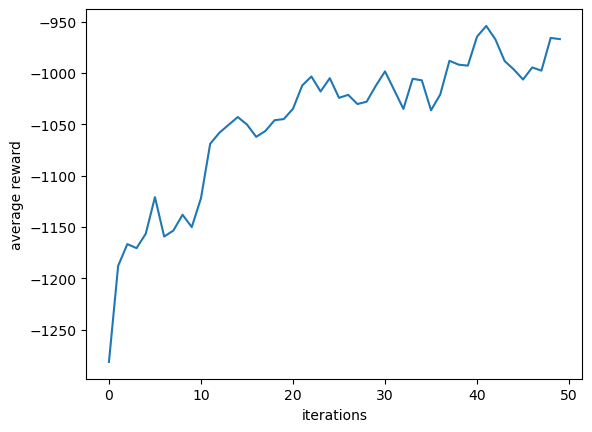

In [13]:
rewards = []
for i in range(50):
    train_info = ppo.train()
    print(f'Episode {i+1}: {np.mean(train_info["hist_stats"]["episode_reward"])}')
    rewards.append(train_info["episode_reward_mean"])

plt.plot(rewards)
plt.xlabel("iterations")
plt.ylabel("average reward")

In [14]:
eval_results = ppo.evaluate()
eval_results["evaluation"]["episode_reward_mean"]

-1100.5798205010476

In [15]:
env = gym.make("Pendulum-v0")

obs = env.reset()
tot_rew = 0
for _ in range(200):
    action = ppo.compute_single_action(obs, explore=False)
    obs, reward, done,_ = env.step(action)
    tot_rew += reward
    if done:
        print(f"You got {tot_rew} points!")
        break
env.close()

You got -1415.1834183218184 points!
